In [ ]:
# based off of https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

In [1]:
from skimage import io, color
from skimage.transform import resize

In [3]:
import os 
from skimage import io

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# use to translate from integers to labels
int_translator = {}
for i, genre in enumerate(genres):
    int_translator[i] = genre

# Load files
image_list = []
labels = []

for label, genre in enumerate(genres):
    list_files = os.listdir('../mel-grams/' + genre)
    for filename in list_files:
        image_list.append(io.imread('../mel-grams/' + genre + '/' + filename))
        labels.append(label)

In [4]:
from skimage import io, color
from skimage.transform import resize

def image_processor(img):
    #img = color.rgb2gray(color.rgba2rgb(img))
    #img = resize(img, (235,500))
    img = img.reshape(-1)
    return img

# flatten images
image_list = [image_processor(image) for image in image_list]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    image_list, labels, test_size=0.2, shuffle=True)

In [6]:
# kNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
from sklearn import metrics

predicted = neigh.predict(X_test)
print(f"Classification report for classifier {neigh}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.45      0.43      0.44        23
           1       0.64      0.56      0.60        25
           2       0.54      0.27      0.36        26
           3       0.21      0.27      0.24        15
           4       0.30      0.83      0.44        12
           5       0.27      0.41      0.33        22
           6       0.36      1.00      0.53        13
           7       0.28      0.24      0.26        21
           8       0.00      0.00      0.00        17
           9       0.25      0.04      0.07        26

    accuracy                           0.36       200
   macro avg       0.33      0.40      0.33       200
weighted avg       0.35      0.36      0.32       200




/Users/jzl/opt/anaconda3/envs/ECS-171/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jzl/opt/anaconda3/envs/ECS-171/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jzl/opt/anaconda3/envs/ECS-171/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

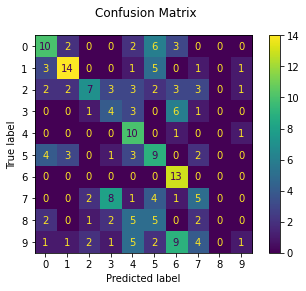

In [9]:
import matplotlib.pyplot as plt

disp = metrics.plot_confusion_matrix(neigh, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()